In [1]:
import numpy as np
import pandas as pd

import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

In [2]:
data = pd.read_csv('ab_browser_test.csv')

In [23]:
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [21]:
data_exp = data[data.slot == 'exp']
data_cont = data[data.slot == 'control']

In [34]:
round((float(sum(data_exp.n_clicks.values))/sum(data_cont.n_clicks.values) - 1)*100,3)

1.614

In [35]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [36]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [42]:
np.random.seed(0)

exp_median_scores = map(np.median, get_bootstrap_samples(data_exp.n_clicks.values, 100))
cont_median_scores = map(np.median, get_bootstrap_samples(data_cont.n_clicks.values, 100))

print "95% confidence interval for the ILEC median repair time:",  stat_intervals(exp_median_scores, 0.05)
print "95% confidence interval for the CLEC median repair time:",  stat_intervals(cont_median_scores, 0.05)

95% confidence interval for the ILEC median repair time: [5. 5.]
95% confidence interval for the CLEC median repair time: [4. 4.]


In [43]:
np.random.seed(0)

exp_mean_scores = map(np.mean, get_bootstrap_samples(data_exp.n_clicks.values, 100))
cont_mean_scores = map(np.mean, get_bootstrap_samples(data_cont.n_clicks.values, 100))

print "95% confidence interval for the ILEC median repair time:",  stat_intervals(exp_mean_scores, 0.05)
print "95% confidence interval for the CLEC median repair time:",  stat_intervals(cont_mean_scores, 0.05)

95% confidence interval for the ILEC median repair time: [11.51021077 11.65679008]
95% confidence interval for the CLEC median repair time: [11.21278193 11.34695708]


In [45]:
delta_median_scores = map(lambda x: x[1] - x[0], zip(exp_median_scores, cont_median_scores))
print "95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)

95% confidence interval for the difference between medians [-1. -1.]


In [46]:
delta_mean_scores = map(lambda x: x[1] - x[0], zip(exp_mean_scores, cont_mean_scores))
print "95% confidence interval for the difference between medians",  stat_intervals(delta_mean_scores, 0.05)

95% confidence interval for the difference between medians [-0.39441327 -0.20696841]


In [47]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [60]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

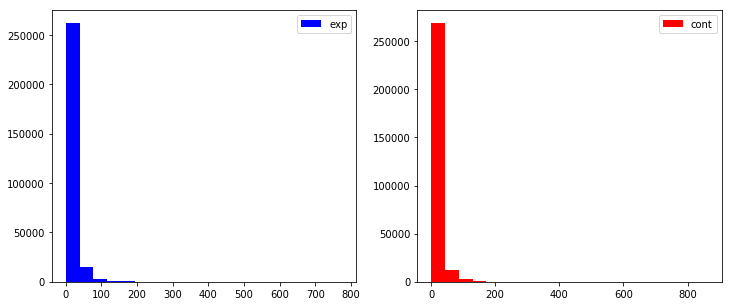

In [49]:
pylab.figure(figsize(12, 5))
pylab.subplot(1,2,1)
pylab.hist(data_exp.n_clicks.values, bins = 20, color = 'b', label = 'exp')
pylab.legend()

pylab.subplot(1,2,2)
pylab.hist(data_cont.n_clicks.values, bins = 20, color = 'r', label = 'cont')
pylab.legend()

pylab.show()

In [50]:
np.random.seed(0)
n_boot_samples = 500

cont_data = get_bootstrap_samples(data_cont.n_clicks.values, n_boot_samples)

In [57]:
mean_cont_data = np.mean(cont_data, axis=1)
s2_cont_data = np.std(cont_data, axis=1)**2
control_boot_chi_squared = zip(mean_cont_data, s2_cont_data)

((array([409.75447609, 417.6076492 , 422.06789456, 425.24996033,
         427.75458277, 429.83540071, 431.6244473 , 433.19958802,
         434.61075771, 435.89197548, 437.06750372, 438.15527962,
         439.16895419, 440.11916758, 441.0143809 , 441.86143812,
         442.66595697, 443.43260794, 444.16531782, 444.86742108,
         445.54177438, 446.19084464, 446.81677748, 447.42145127,
         448.00652022, 448.57344901, 449.12354099, 449.6579613 ,
         450.17775596, 450.68386771, 451.17714938, 451.65837504,
         452.12824958, 452.58741674, 453.03646615, 453.47593922,
         453.90633437, 454.32811152, 454.74169597, 455.14748186,
         455.54583518, 455.93709642, 456.3215829 , 456.69959087,
         457.07139736, 457.43726183, 457.79742761, 458.1521233 ,
         458.50156388, 458.84595184, 459.1854781 , 459.52032292,
         459.85065667, 460.17664058, 460.49842735, 460.81616179,
         461.12998133, 461.44001656, 461.74639164, 462.04922476,
         462.3486285 , 46

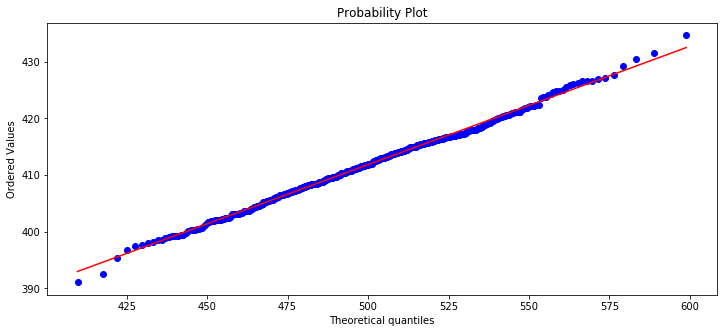

In [61]:
scipy.stats.probplot(s2_cont_data, dist="chi2", sparams=(n_boot_samples-1), plot=plt)

((array([496.00790142, 496.28984073, 496.44837459, 496.56078615,
         496.64886689, 496.72177909, 496.78427733, 496.83915848,
         496.88821233, 496.93265597, 496.97335597, 497.01095206,
         497.04593046, 497.07866967, 497.10947035, 497.13857541,
         497.16618407, 497.1924618 , 497.2175476 , 497.24155939,
         497.26459814, 497.28675096, 497.30809357, 497.3286922 ,
         497.34860517, 497.36788405, 497.38657472, 497.40471817,
         497.42235117, 497.43950686, 497.45621519, 497.47250333,
         497.48839601, 497.50391582, 497.51908341, 497.53391776,
         497.54843633, 497.56265521, 497.57658929, 497.59025236,
         497.60365721, 497.61681574, 497.62973905, 497.64243747,
         497.65492068, 497.66719774, 497.67927713, 497.69116683,
         497.70287433, 497.71440669, 497.72577056, 497.73697222,
         497.74801761, 497.75891232, 497.76966169, 497.78027074,
         497.79074426, 497.80108678, 497.81130262, 497.82139589,
         497.8313705 , 49

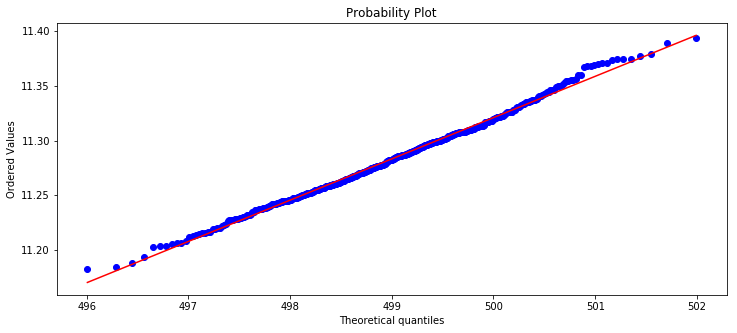

In [63]:
scipy.stats.probplot(mean_cont_data, dist="norm", sparams=(n_boot_samples-1), plot=plt)

In [98]:
data_cont[data_cont.userID == 187470]

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
178317,187470,Browser #2,control,1,2,1
178318,187470,Browser #22,control,6,12,9


In [100]:
exp_clicks = data_exp.groupby('userID')
cont_clicks = data_cont.groupby('userID')

In [102]:
exp_group = exp_clicks['n_clicks'].agg(sum)
cont_group = cont_clicks['n_clicks'].agg(sum)

In [113]:
exp_clicks.agg(sum).head()

,n_clicks,n_queries,n_nonclk_queries
userID,,,
1,23,32,19
3,3,4,2
5,29,35,16
7,54,68,30
9,6,3,1


In [104]:
stats.mannwhitneyu(exp_group.values, cont_group.values)

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

In [116]:
data_exp_2 = data_exp[data_exp.browser == 'Browser #2']
data_exp_14 = data_exp[data_exp.browser == 'Browser #14']
data_exp_17 = data_exp[data_exp.browser == 'Browser #17']
data_exp_20 = data_exp[data_exp.browser == 'Browser #20']
data_exp_22 = data_exp[data_exp.browser == 'Browser #22']
data_exp_4 = data_exp[data_exp.browser == 'Browser #4']

data_cont_2 = data_cont[data_cont.browser == 'Browser #2']
data_cont_14 = data_cont[data_cont.browser == 'Browser #14']
data_cont_17 = data_cont[data_cont.browser == 'Browser #17']
data_cont_20 = data_cont[data_cont.browser == 'Browser #20']
data_cont_22 = data_cont[data_cont.browser == 'Browser #22']
data_cont_4 = data_cont[data_cont.browser == 'Browser #4']

data_exp_br = [data_exp_2, data_exp_14, data_exp_17, data_exp_20, data_exp_22, data_exp_4]
data_cont_br = [data_cont_2, data_cont_14, data_cont_17, data_cont_20, data_cont_22, data_cont_4]

In [122]:
exp_group_br = []
cont_group_br = []

for i in range(6):
    exp_group_br.append(data_exp_br[i].groupby('userID')['n_clicks'].agg(sum).values)
    cont_group_br.append(data_cont_br[i].groupby('userID')['n_clicks'].agg(sum).values)


In [125]:
tests = []
for i in range(6):
    tests.append(stats.mannwhitneyu(exp_group_br[i], cont_group_br[i]))


In [127]:
p = [i[1] for i in tests]

In [147]:
p

[0.0272438604197241,
 0.0,
 0.03740060143010802,
 0.45366656388735377,
 0.2574055152210032,
 0.40760617658454984]

In [129]:
from statsmodels.sandbox.stats.multicomp import multipletests 

In [130]:
reject, p_corrected, a1, a2 = multipletests(p, 
                                            alpha = 0.05, 
                                            method = 'holm') 

In [131]:
reject

array([False,  True, False, False, False, False])

In [135]:
br_exp_clicks = data_exp.groupby('browser').agg(sum)
br_cont_clicks = data_cont.groupby('browser').agg(sum)

In [140]:
br_exp_clicks

,userID,n_clicks,n_queries,n_nonclk_queries
browser,,,,
Browser #14,14903639817,294556,282606,123656
Browser #17,4624596106,266285,210123,77614
Browser #2,16998146364,560109,548019,246514
Browser #20,4896313412,223212,187283,72998
Browser #22,21217798358,858666,743156,296177
Browser #4,22195973421,1058995,1011250,456508


In [143]:
br_exp_non_clicks = map(float, br_exp_clicks.n_nonclk_queries)/br_exp_clicks.n_queries * 100

In [144]:
br_exp_non_clicks

browser
Browser #14    43.755617
Browser #17    36.937413
Browser #2     44.982747
Browser #20    38.977376
Browser #22    39.853947
Browser #4     45.142942
Name: n_queries, dtype: float64

In [145]:
br_cont_non_clicks = map(float, br_cont_clicks.n_nonclk_queries)/br_cont_clicks.n_queries * 100

In [146]:
br_cont_non_clicks

browser
Browser #14    57.590411
Browser #17    36.299367
Browser #2     45.962747
Browser #20    40.540485
Browser #22    40.593977
Browser #4     46.970930
Name: n_queries, dtype: float64

In [148]:
br_exp_non_clicks - br_cont_non_clicks

browser
Browser #14   -13.834794
Browser #17     0.638046
Browser #2     -0.980000
Browser #20    -1.563108
Browser #22    -0.740029
Browser #4     -1.827988
Name: n_queries, dtype: float64